## Imports


In [20]:
import utils
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"], # This matches LaTeX's default font
    "font.size": 11,                       # This matches the 11pt in \documentclass
})

x,y,y_noise = utils.dataset()

In [21]:
### Comparison of my MSE and R2 implementations with sklearn's
from sklearn.metrics import mean_squared_error, r2_score
from utils import MSE, R2, OLS_parameters, Ridge_parameters
print("MSE comparison:", utils.MSE(y, y_noise)-  mean_squared_error(y, y_noise))
print("R2 comparison:", utils.R2(y, y_noise) - r2_score(y, y_noise))

## Comparison of OLS and Ridge regression
from sklearn.linear_model import LinearRegression, Ridge

y_centered = y - np.mean(y)

X = utils.polynomial_features(x, 5)
ols = LinearRegression(fit_intercept=False)
ridge = Ridge(alpha=1.0, fit_intercept=False)
ols.fit(X, y_centered)
ridge.fit(X, y_centered)
my_OLS = OLS_parameters(X, y_centered)
my_ridge = Ridge_parameters(X, y_centered, regularization=1.0)

print("OLS comparison:", np.linalg.norm(ols.coef_.T - my_OLS))
print("Ridge comparison:", np.linalg.norm(ridge.coef_.T - my_ridge)) # Note: small differences due is probably because of a difference in algorithms for matrix inversion


MSE comparison: 0.0
R2 comparison: 0.0
OLS comparison: 1.528837955148612e-14
Ridge comparison: 0.8125866645040006


## OLS Analysis

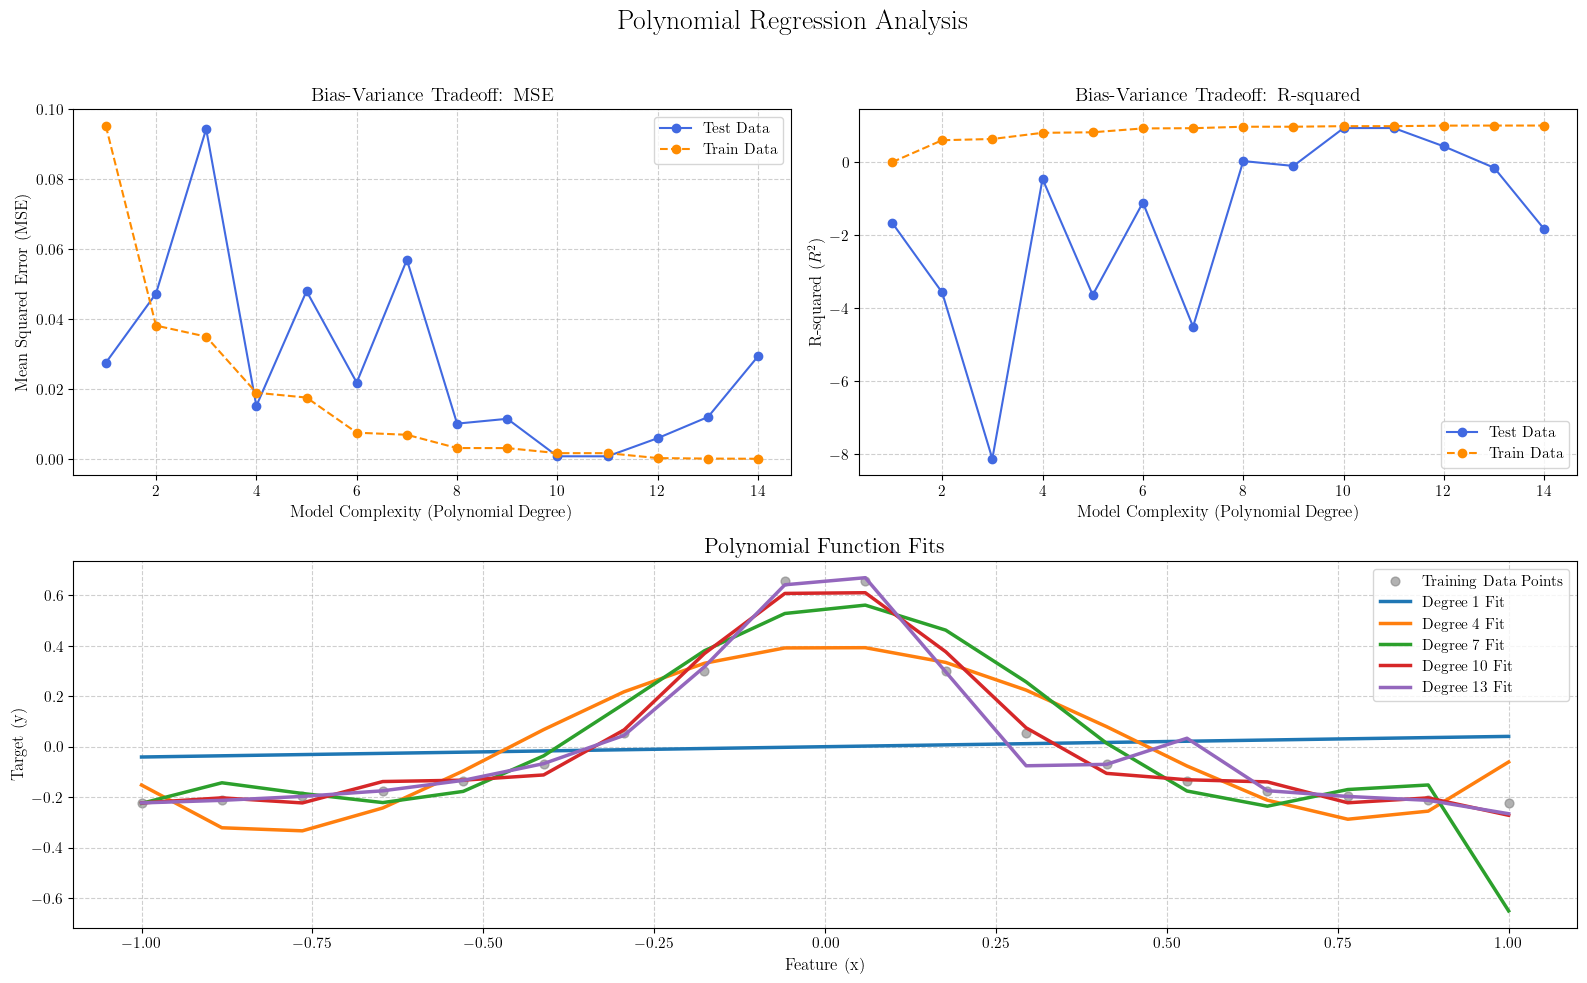

In [54]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import polynomial_features, MSE, R2


plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 15)
x,y,y_noise = utils.dataset(18)
#Centering the y values around zero to remove the intercept
y_centered = y - y.mean()

for degree in degrees:
    # Prepare polynomial features and standardize them
    X = utils.polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)

    # Fit OLS model
    beta = utils.OLS_parameters(X_train, y_train)
    beta_norms.append(beta)

    # Predictions and metrics
    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    plot_predict["mse"].append(MSE(y_test, y_pred))
    plot_train["mse"].append(MSE(y_train, y_train_pred))
    plot_predict["r2"].append(R2(y_test, y_pred))
    plot_train["r2"].append(R2(y_train, y_train_pred))

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)

fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) # MSE plot
ax2 = fig.add_subplot(gs[0, 1]) # R2 plot
ax3 = fig.add_subplot(gs[1, :]) # Polynomial fits plot

#Clipping to make it better to see
#plot_predict["mse"] = np.clip(plot_predict["mse"], 0, 0.1) 

#MSE plots
ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax1.set_ybound(upper=0.1)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

#R2 plots
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("Bias-Variance Tradeoff: R-squared", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


#Polynomial fits plot
ax3.scatter(x, y_centered, label='Training Data Points', color='gray', alpha=0.6, s=40)
plotted_degrees = degrees[::3]
for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)



plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Combined_Analysis_OLS.png")
plt.show()


(14, 14)


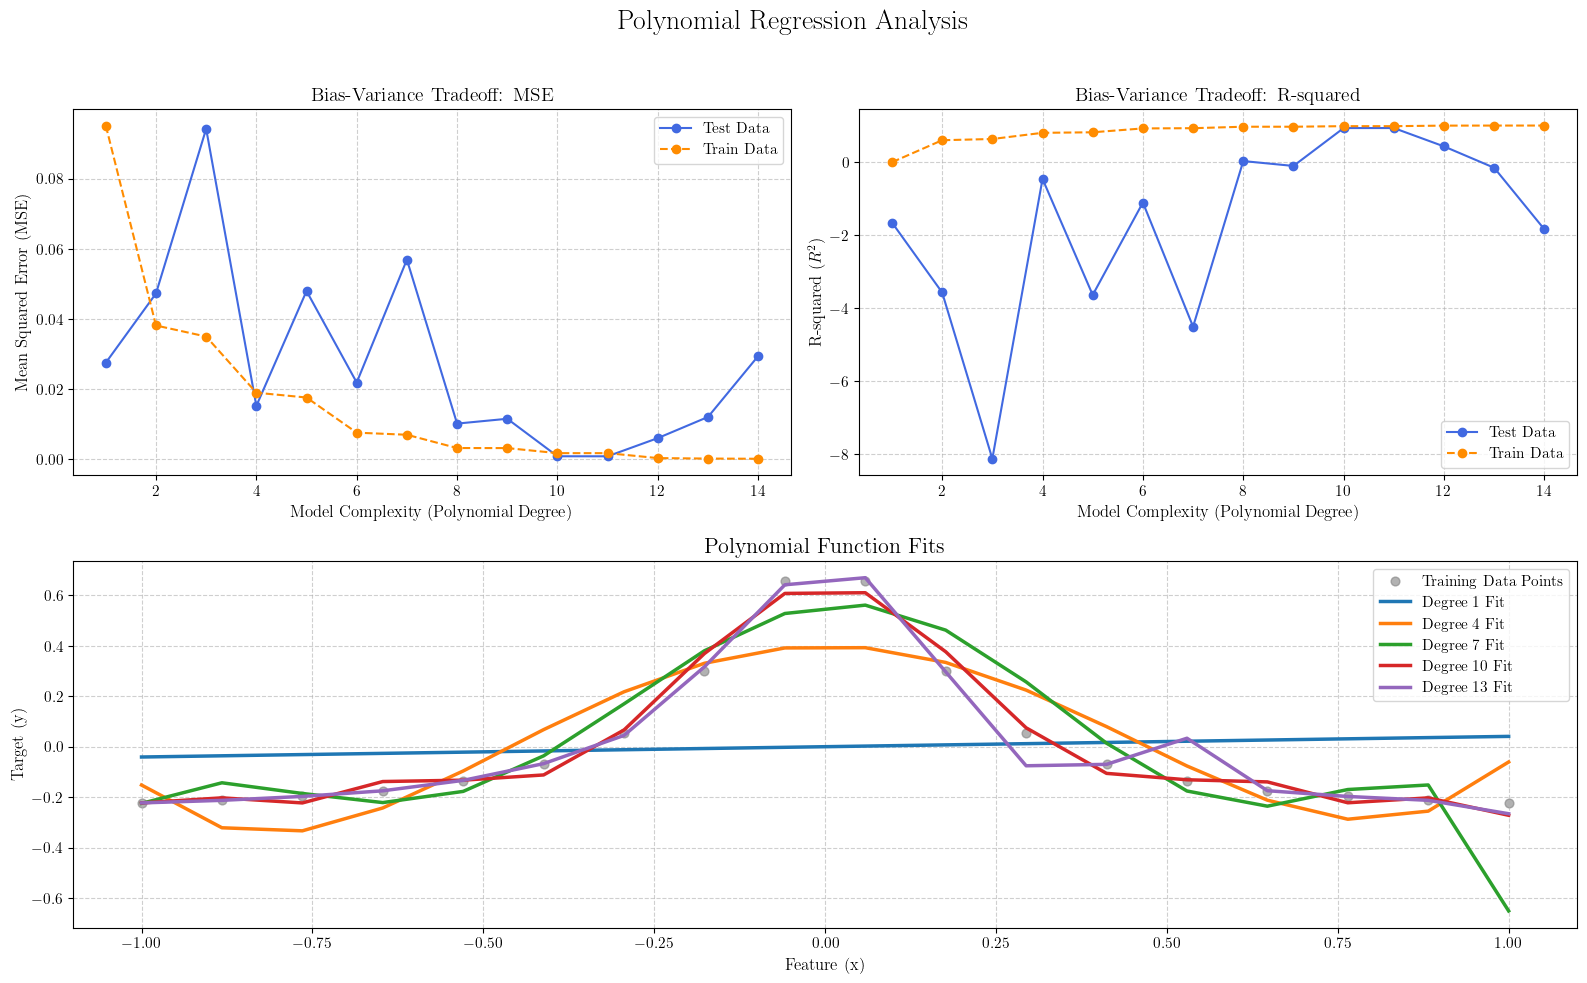

In [52]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import polynomial_features, MSE, R2


plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 15)
x,y,y_noise = utils.dataset(18)
#Centering the y values around zero to remove the intercept
y_centered = y_noise - y_noise.mean()

for degree in degrees:
    # Prepare polynomial features and standardize them
    X = utils.polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)

    # Fit OLS model
    beta = utils.OLS_parameters(X_train, y_train)
    beta_norms.append(beta)

    # Predictions and metrics
    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    plot_predict["mse"].append(MSE(y_test, y_pred))
    plot_train["mse"].append(MSE(y_train, y_train_pred))
    plot_predict["r2"].append(R2(y_test, y_pred))
    plot_train["r2"].append(R2(y_train, y_train_pred))

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)

fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) # MSE plot
ax2 = fig.add_subplot(gs[0, 1]) # R2 plot
ax3 = fig.add_subplot(gs[1, :]) # Polynomial fits plot

#Clipping to make it better to see
plot_predict["mse"] = np.clip(plot_predict["mse"], 0, 0.1) 

#MSE plots
ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

#R2 plots
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("Bias-Variance Tradeoff: R-squared", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


#Polynomial fits plot
ax3.scatter(x, y_centered, label='Training Data Points', color='gray', alpha=0.6, s=40)
plotted_degrees = degrees[::3]
for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)
print(X_train.shape)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Combined_Analysis_OLS_noise.png")
plt.show()


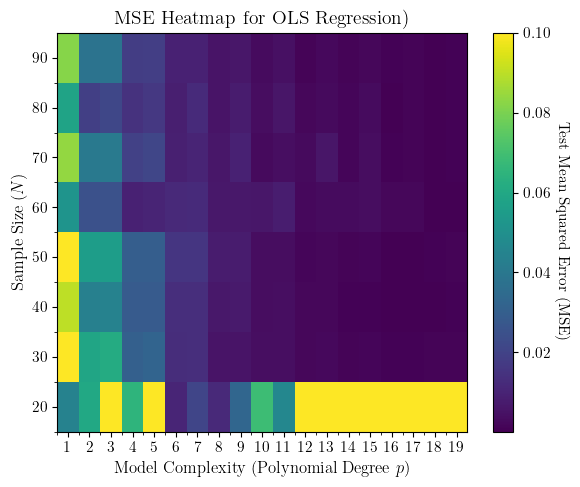

In [58]:
from utils import polynomial_features, MSE, R2, dataset

degrees = np.arange(1, 20)
N_values = np.arange(20, 100, 10)

mse_matrix = np.zeros((len(N_values), len(degrees)))

for i, N in enumerate(N_values):
    x, y_true, y_noisy = dataset(n=N)
    y_centered = y_noisy - y_noisy.mean()
    for j, degree in enumerate(degrees):
    
        X = polynomial_features(x, degree, intercept=True)
        # Standardize Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        # Split data (80/20 split)

        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_centered, test_size=0.2, random_state=42
        )
        # Predictions
        beta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

plot_mse = np.clip(mse_matrix, 0, 0.1) 
fig, ax = plt.subplots(figsize=(6, 5))

c = ax.pcolormesh(degrees, N_values, plot_mse, 
                  cmap='viridis')

# Set labels and titles
ax.set_title('MSE Heatmap for OLS Regression)', fontsize=14)
ax.set_xlabel('Model Complexity (Polynomial Degree $p$)', fontsize=12)
ax.set_ylabel('Sample Size ($N$)', fontsize=12)

# Adjust tick marks to show the specific degrees and N values tested
# Adjust x-ticks to be centered on the degrees
ax.set_xticks(degrees)
ax.set_xticklabels(degrees)
ax.set_xticks(degrees - 0.5, minor=True)
# Adjust y-ticks to be centered on the N values
ax.set_yticks(N_values)
ax.set_yticklabels(N_values)
N_step = N_values[1] - N_values[0]
ax.set_yticks(N_values - N_step / 2, minor=True)


# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (MSE)', rotation=-90, va="bottom")

# Save the figure
filename = "OLS_Heatmap.pdf"
plt.tight_layout()
plt.savefig(filename)
plt.show()

## Ridge

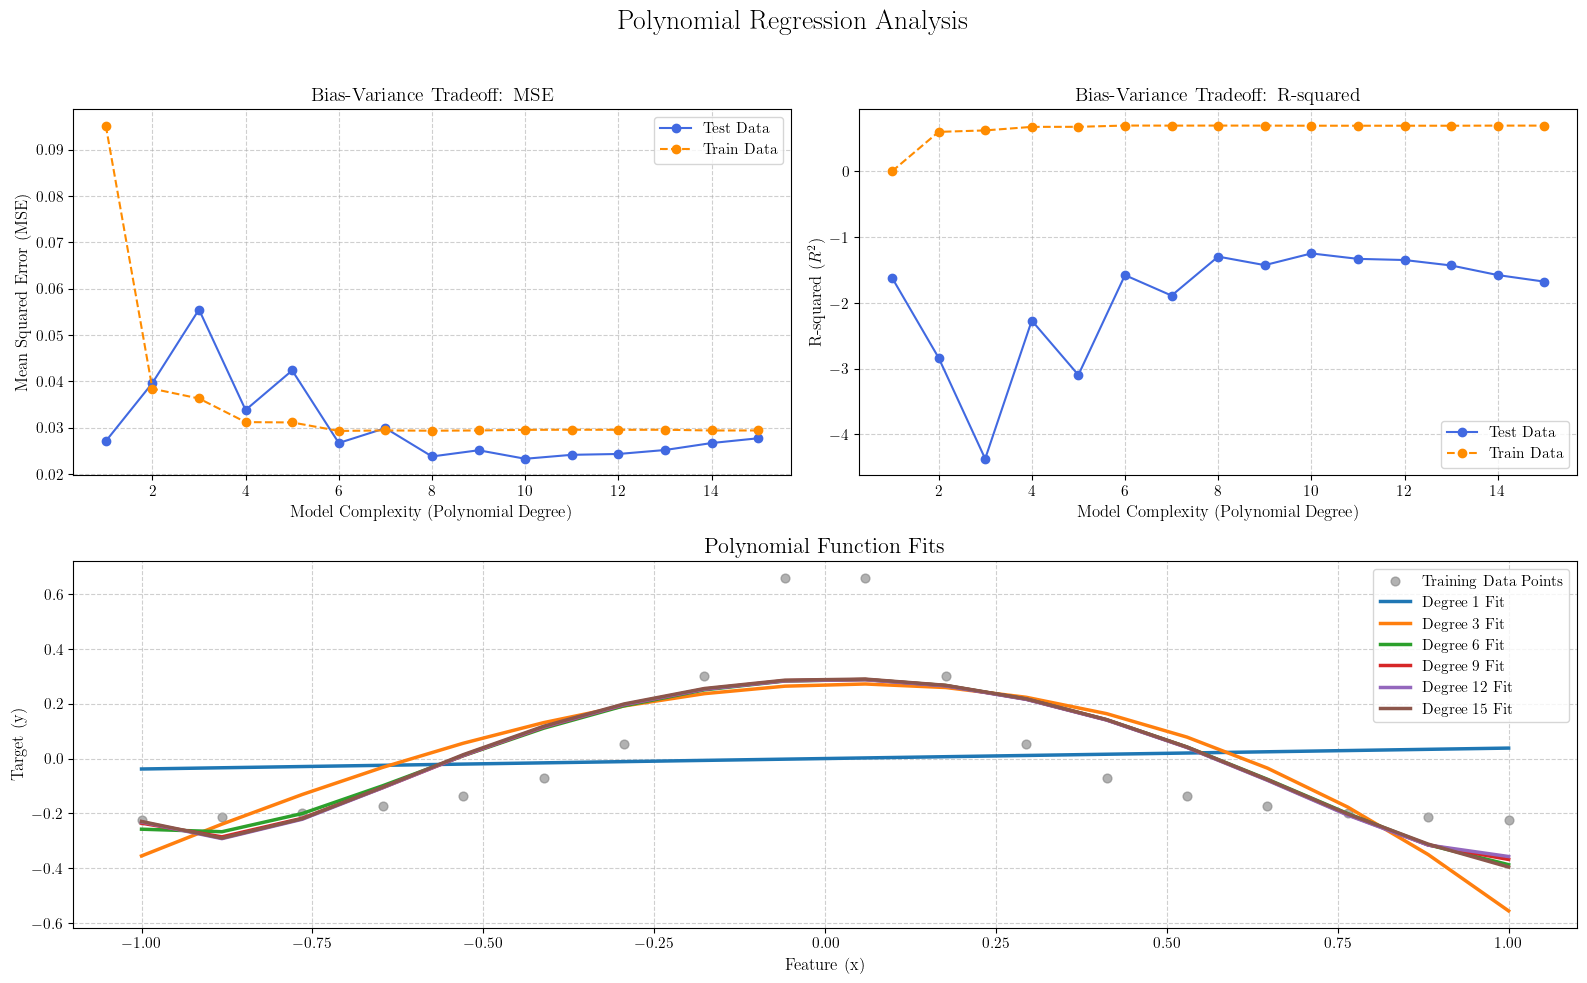

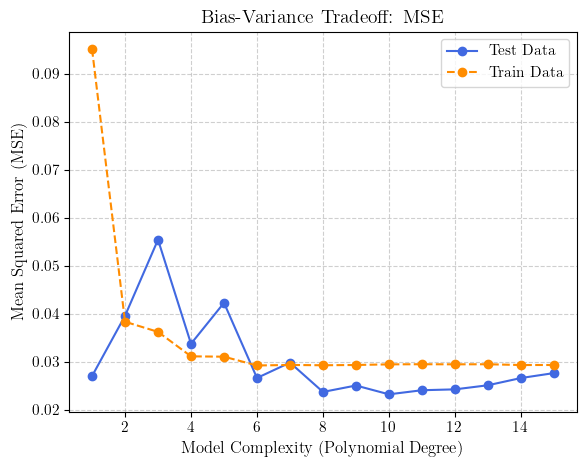

In [57]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plot_predict = {"mse" :[],
                "r2" : []}
plot_train = {"mse":[],
              "r2": []}
beta_norms = []
degrees = np.arange(1, 16)

y_centered = y - y.mean() 

for degree in degrees:
    X = polynomial_features(x, degree)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y_centered, test_size=0.2, random_state=57)
    
    beta = Ridge_parameters(X_train, y_train)
    beta_norms.append(beta)

    y_pred = X_test @ beta
    y_train_pred = X_train @ beta
    plot_predict["mse"].append(MSE(y_test, y_pred))
    plot_train["mse"].append(MSE(y_train, y_train_pred))
    plot_predict["r2"].append(R2(y_test, y_pred))
    plot_train["r2"].append(R2(y_train, y_train_pred))

fig = plt.figure(figsize=(16, 10))
gs = gridspec.GridSpec(2, 2)
fig.suptitle('Polynomial Regression Analysis', fontsize=20)

ax1 = fig.add_subplot(gs[0, 0]) 
ax2 = fig.add_subplot(gs[0, 1]) 
ax3 = fig.add_subplot(gs[1, :]) 

ax1.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax1.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax1.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax1.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax1.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)



# --- Plot 2: R-squared (on the second axis, ax2) ---
ax2.plot(degrees, plot_predict["r2"], label="Test Data", marker='o', color='royalblue')
ax2.plot(degrees, plot_train["r2"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax2.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax2.set_ylabel("R-squared ($R^2$)", fontsize=12)
ax2.set_title("Bias-Variance Tradeoff: R-squared", fontsize=14)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)
# R2 is bounded by 1, negative values indicate a very poor fit


ax3.scatter(x, y_centered, label='Training Data Points', color='gray', alpha=0.6, s=40)


plotted_degrees = [1, 3, 6, 9, 12, 15]

for degree in plotted_degrees:
    X_full = polynomial_features(x, degree)
    scaler = StandardScaler()
    X_full_scaled = scaler.fit_transform(X_full)
    y_pred = X_full_scaled @ beta_norms[degree - 1]
    
    ax3.plot(x, y_pred, label=f'Degree {degree} Fit', linewidth=2.5)

ax3.set_xlabel("Feature (x)", fontsize=12)
ax3.set_ylabel("Target (y)", fontsize=12)
ax3.set_title("Polynomial Function Fits", fontsize=16)
ax3.legend(fontsize=11)
ax3.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("Combined_Analysis_Ridge.pdf")
plt.show()

#Plot of only the MSE values
fig, ax = plt.subplots(figsize=(6, 5))





ax.plot(degrees, plot_predict["mse"], label="Test Data", marker='o', color='royalblue')
ax.plot(degrees, plot_train["mse"], label="Train Data", marker='o', linestyle='--', color='darkorange')
ax.set_xlabel("Model Complexity (Polynomial Degree)", fontsize=12)
ax.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
ax.set_title("Bias-Variance Tradeoff: MSE", fontsize=14)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)


# --- Save and show the final combined plot ---
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("MSE_RidgeOnly.png")

plt.show()





### Looking at the lambdas 

<>:59: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Anton\AppData\Local\Temp\ipykernel_10036\773855316.py:59: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)


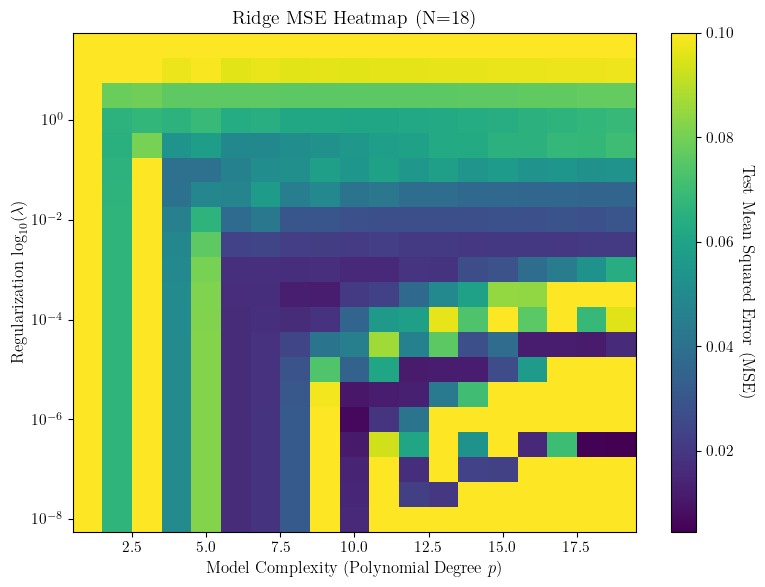

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from utils import polynomial_features, MSE, R2, dataset, Ridge_parameters 



N_fixed = 18                          
degrees = np.arange(1, 20)           
regularizations = np.logspace(-8, 2, 20)  

# Initialize matrix: rows = regularization, columns = degree
# The size must match the loops: (len(regularizations), len(degrees))
mse_matrix = np.zeros((len(regularizations), len(degrees)))

# --- Generate Fixed Data ---
# Use the fixed N for consistency
x, y_true, y_noisy = dataset(n=N_fixed)
y_centered = y_noisy - y_noisy.mean()
y_centered = y_centered.ravel() # Ensure y is 1D

# --- Outer Loop: Regularization (i) ---
for i, reg in enumerate(regularizations):
    # --- Inner Loop: Degree (j) ---
    for j, degree in enumerate(degrees):
        
        X = polynomial_features(x, degree, intercept=True)
        
        # Standardize Features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Split data (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y_centered, test_size=0.2, random_state=42
        )
        
        # Predictions using Ridge with current regularization (reg)
        beta = Ridge_parameters(X_train, y_train, regularization=reg)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

# --- Plotting ---
plot_mse = np.clip(mse_matrix, 0, 0.1) 
fig, ax = plt.subplots(figsize=(8, 6))


log_regularizations = np.log10(regularizations)
c = ax.pcolormesh(degrees, log_regularizations, plot_mse, 
                  cmap='viridis', shading='auto')

# Set labels and titles
ax.set_title(f'Ridge MSE Heatmap (N={N_fixed})', fontsize=14)
ax.set_xlabel('Model Complexity (Polynomial Degree $p$)', fontsize=12)
ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)

# Adjust y-ticks to show the log values
y_tick_positions = log_regularizations[::4] 
ax.set_yticks(y_tick_positions)
ax.set_yticklabels([f'$10^{{{l:.0f}}}$' for l in y_tick_positions]) 

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (MSE)', rotation=-90, va="bottom", fontsize=12)

plt.tight_layout()
plt.savefig("Ridge_Degree_Lambda_Heatmap.pdf")
plt.show()

<>:50: SyntaxWarning: invalid escape sequence '\l'
<>:50: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Anton\AppData\Local\Temp\ipykernel_10036\237804763.py:50: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)


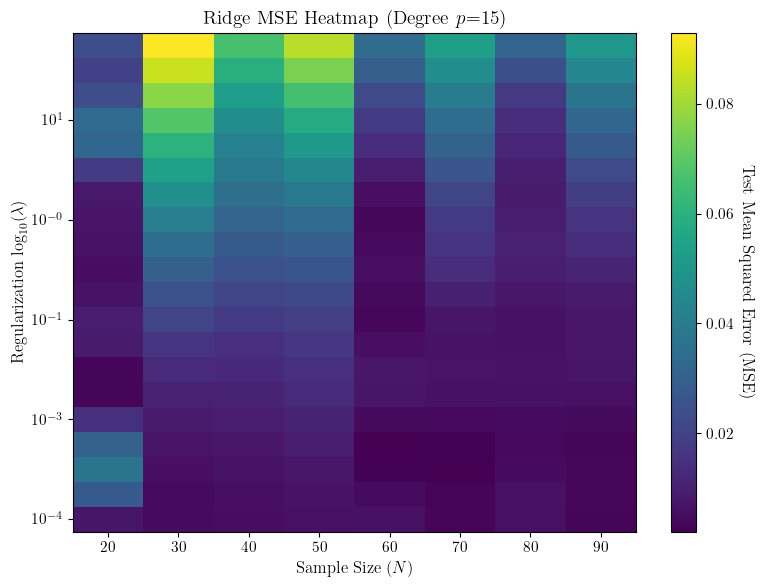

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Assuming these are available in your environment or 'utils'
from utils import polynomial_features, MSE, R2, dataset, Ridge_parameters 
# Note: Added imports for standard ML functions and numpy

# --- Setup Parameters ---
degree_fixed = 15
N_values = np.arange(20, 100, 10)     
regularizations = np.logspace(-4, 2, 20) 

mse_matrix = np.zeros((len(regularizations), len(N_values)))


for j, N in enumerate(N_values):
    x, y_true, y_noisy = dataset(n=N)
    y_centered = y_noisy - y_noisy.mean()
    
    X_base = polynomial_features(x, degree_fixed, intercept=True)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_base)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_centered, test_size=0.2, random_state=42
    )

    for i, reg in enumerate(regularizations):
        
        # Predictions using Ridge with current regularization (reg)
        beta = Ridge_parameters(X_train, y_train, regularization=reg)
        y_pred = X_test @ beta
        test_mse = MSE(y_test, y_pred)
        
        mse_matrix[i, j] = test_mse

# --- Plotting ---
plot_mse = np.clip(mse_matrix, 0, 0.1) 
fig, ax = plt.subplots(figsize=(8, 6))

log_regularizations = np.log10(regularizations)
c = ax.pcolormesh(N_values, log_regularizations, plot_mse, 
                  cmap='viridis', shading='auto')

# Set labels and titles
ax.set_title(f'Ridge MSE Heatmap (Degree $p$={degree_fixed})', fontsize=14)
ax.set_xlabel('Sample Size ($N$)', fontsize=12)
ax.set_ylabel('Regularization $\log_{10}(\lambda)$', fontsize=12)

# Adjust X-ticks (N_values)
ax.set_xticks(N_values)
ax.set_xticklabels(N_values)

# Adjust Y-ticks (log lambda)
y_tick_positions = log_regularizations[::4] 
ax.set_yticks(y_tick_positions)
ax.set_yticklabels([f'$10^{{{l:.0f}}}$' for l in y_tick_positions]) 

# Add color bar
cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_ylabel('Test Mean Squared Error (MSE)', rotation=-90, va="bottom", fontsize=12)

# Save the figure
filename = "Ridge_N_Lambda_Heatmap.pdf"
plt.tight_layout()
plt.savefig(filename)
plt.show()